# アナログ信号

In [2]:
import os
import sys
import pyaudio
import numpy as np
import scipy as sp
import scipy.io.wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

波形をプロットする関数

In [52]:
def plot_wave(time, amp, xtitle='Time[s]', ytitle='Amplitude[arb.]', hold=False, color='blue', marker=',', legend='', linestyle='-', stem=False):
    """
    波形プロット
    @Param time         : 時刻の離散データ
    @Param amplitude    : 時刻データに対応する瞬時振幅値
    @Param xtitle       : 横軸ラベル
    @Param ytitle       : 縦軸ラベル
    @Param hold         : False -> 描画, True -> データ保持
    @Param color        : グラフの色
    @Param marker       : マーカの種類
    @Param legend       : 凡例の文字列
    @Param linestyle    : 線の種類
    @Param stem         : False -> 折れ線グラフ, True -> ○付き棒グラフ
    """
    if (len(time) == 0):
        time = range(len(amp))
        if (xtitle == 'Time[s]'):
            xtitle = 'Time[point]'

    if (marker != ','):
        linestyle = ''

    if (stem == False):
        plt.plot(time, amp, color=color, marker=marker, linestyle=linestyle, label=legend)
    else:
        plt.stem(time, amp, label=legend, use_line_collection = True)

    if (legend != ''):
        plt.legend()

    if (hold == False):
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        plt.show()

## 正弦波を重ね合わせる

単一周波数の音（純音）を聞いてみる。

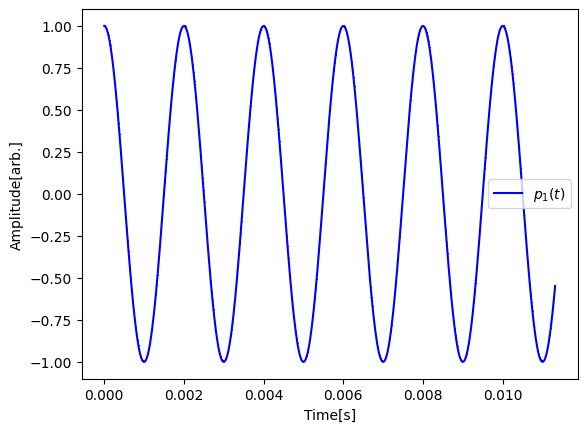

In [4]:
fs = 44100                      # サンプリング周波数
f1 = 500                        # 波形1の周波数
A  = 1                          # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
p1 = A*np.cos(2*np.pi*f1*dt)    # 波形1

plot_range = 500
plot_wave(dt[0:plot_range], p1[0:plot_range], color='b', legend='$p_1(t)$')

audio = Audio(p1, rate=fs)
audio

### 2成分合成波

2つの周期的な波の複合音を合成して聞いてみる。

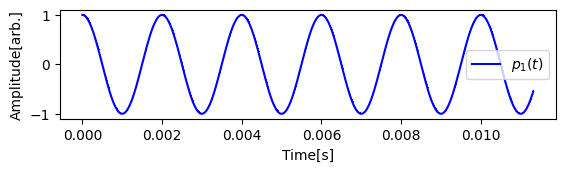

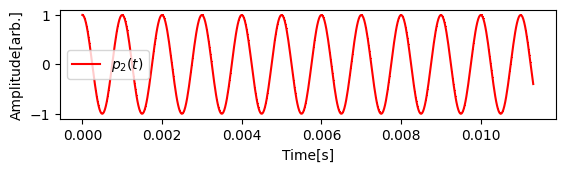

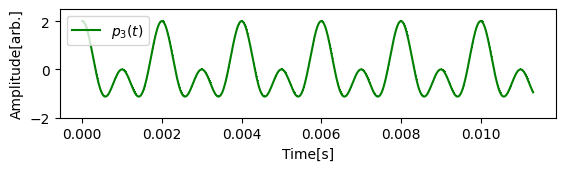

In [5]:
fs = 44100                      # サンプリング周波数
f1 = 500                        # 波形1の周波数
f2 = 1000                       # 波形2の周波数
A  = 1                          # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
p1 = A*np.cos(2*np.pi*f1*dt)    # 波形1
p2 = A*np.cos(2*np.pi*f2*dt)    # 波形2
p3 = p1 + p2                    # 波形1と波形2の混合

plot_range = 500
plt.subplot(3, 1, 1)
plot_wave(dt[0:plot_range], p1[0:plot_range], color='b', legend='$p_1(t)$')
plt.subplot(3, 1, 2)
plot_wave(dt[0:plot_range], p2[0:plot_range], color='r', legend='$p_2(t)$')
plt.subplot(3, 1, 3)
plt.ylim(-2,2.5)
plot_wave(dt[0:plot_range], p3[0:plot_range], color='g', legend='$p_3(t)$')

audio = Audio(p3, rate=fs)
audio

純音に比べて少し複雑な音になった。また、2つの波は周期的であるため、合成した波も周期的である。今回の合成波は、500[Hz]（周期は2[ms]）。

$f1 = 500$[Hz]、$f1 = 1732$[Hz]のように2つの周波数が整数倍ではない場合の合成波を見てみる。

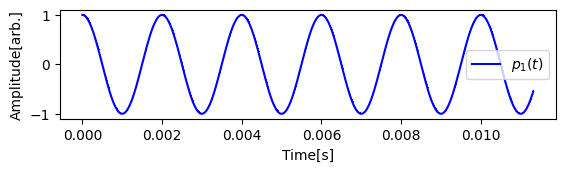

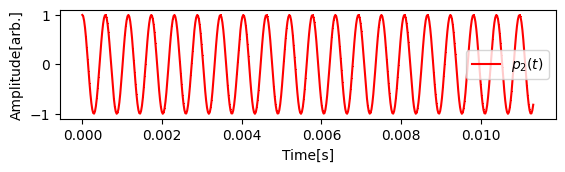

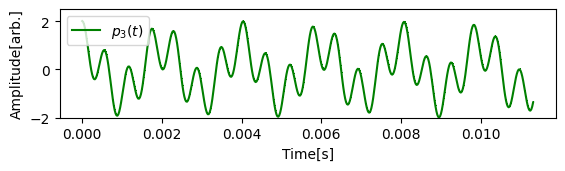

In [6]:
fs = 44100                      # サンプリング周波数
f1 = 500                        # 波形1の周波数
f2 = 1732                       # 波形2の周波数
A  = 1                          # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
p1 = A*np.cos(2*np.pi*f1*dt)    # 波形1
p2 = A*np.cos(2*np.pi*f2*dt)    # 波形2
p3 = p1 + p2                    # 波形1と波形2の混合

plot_range = 500
plt.subplot(3, 1, 1)
plot_wave(dt[0:plot_range], p1[0:plot_range], color='b', legend='$p_1(t)$')
plt.subplot(3, 1, 2)
plot_wave(dt[0:plot_range], p2[0:plot_range], color='r', legend='$p_2(t)$')
plt.subplot(3, 1, 3)
plt.ylim(-2,2.5)
plot_wave(dt[0:plot_range], p3[0:plot_range], color='g', legend='$p_3(t)$')

audio = Audio(p3, rate=fs)
audio

周期的な波形にならないことがわかる。

### 3成分合成波

合成波を構成する波の周波数比が整数倍であるとき、最も低い周波数を**基本周波数**といい、その周波数成分を**基本波（基本周波数成分）**という。また、基本周波数のn倍の周波数をもつ成分を第n高調波という。

基本周波数の整数倍を成分をもつ波形の合成波を見てみる。

$
p(t) = A\cos{(2\pi{f_0{t}})} + A\cos{(2\pi(2{f_0})t)} + A\cos{(2\pi(3{f_0})t)}\\
q(t) = A\cos{(2\pi{f_0{t}})} + A\cos{(k\pi(2{f_0})t)} + A\cos{(2\pi(3{f_0})t)}\\
ただし、k \neq 2
$

まずは、$k = 2.1$で実行してみる。

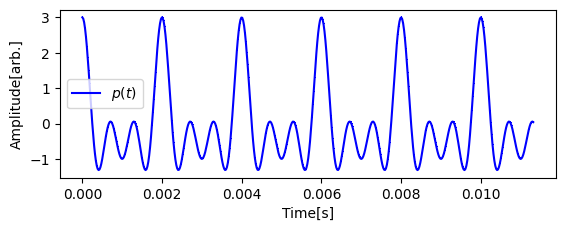

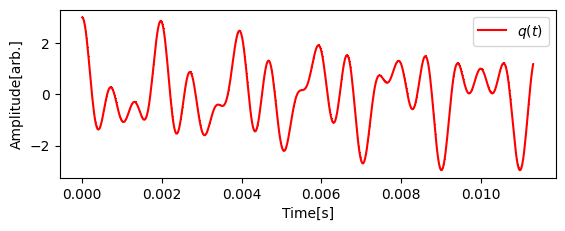

In [7]:
f0 = 500                        # 基本周波数
A = 1                           # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A*np.cos(2*np.pi*1*f0*dt)  # 波形1
f2 = A*np.cos(2*np.pi*2*f0*dt)  # 波形2
f3 = A*np.cos(2*np.pi*3*f0*dt)  # 波形3
k = 2.1                         # 非整数倍
fk = A*np.cos(2*np.pi*k*f0*dt)  # 非整数倍の波形

pt = f1 + f2 + f3
qt = f1 + fk + f3

plot_range = 500
plt.subplot(2, 1, 1)
plot_wave(dt[0:plot_range], pt[0:plot_range], color='b', legend='$p(t)$')
plt.subplot(2, 1, 2)
plot_wave(dt[0:plot_range], qt[0:plot_range], color='r', legend='$q(t)$')

audio = Audio(qt, rate = fs)
audio

周波数が整数倍でない正弦波を重ね合わせても、周期波形にならないことがわかる。ただし、基本周波数50[Hz]の第10高調波（500[Hz]）第21高調波（1050[Hz]）、第30高調波（1500[Hz]）を重ね合わせた波形になっており、長い時間で観測すれば繰り返しの波形となっている。本当の意味での周期波形でない波形は、周波数の比が無理数となる2つの波形を重ねる。

$k = 2.5$とした場合を見てみる。

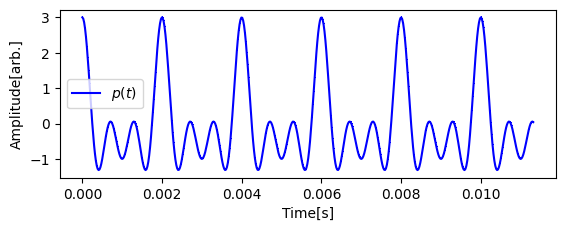

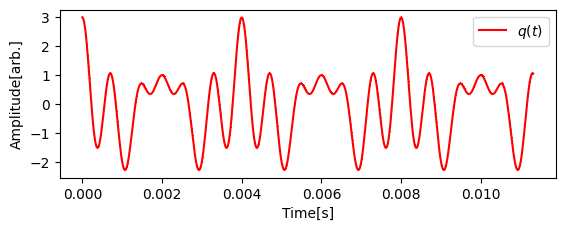

In [8]:
f0 = 500                        # 基本周波数
A = 1                           # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A*np.cos(2*np.pi*1*f0*dt)  # 波形1(500[Hz])
f2 = A*np.cos(2*np.pi*2*f0*dt)  # 波形2(1000[Hz])
f3 = A*np.cos(2*np.pi*3*f0*dt)  # 波形3(1500[Hz])
k = 2.5                         # 非整数倍
fk = A*np.cos(2*np.pi*k*f0*dt)  # 非整数倍の波形(1250[Hz])

pt = f1 + f2 + f3
qt = f1 + fk + f3

plot_range = 500
plt.subplot(2, 1, 1)
plot_wave(dt[0:plot_range], pt[0:plot_range], color='b', legend='$p(t)$')
plt.subplot(2, 1, 2)
plot_wave(dt[0:plot_range], qt[0:plot_range], color='r', legend='$q(t)$')

audio = Audio(qt, rate = fs)
audio

$k = 2.5$とした場合は、0.004[s]の周期波形になっていることがわかる。つまり、この場合は基本周波数250[Hz]の波形であり、第2高調波（500[Hz]）、第5高調波（1250[Hz]）、第6高調波（1500[Hz]）の波を重ね合わせていることになる。

### 振幅と波形の関係

各波形の振幅を変えた合成波を見てみる。

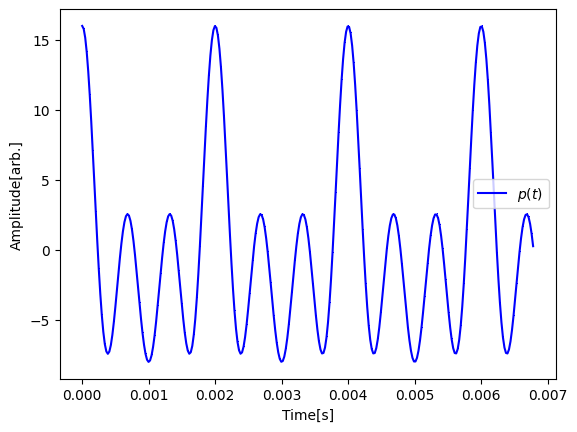

In [9]:
f0 = 500                        # 基本周波数
A1 = 5                          # 振幅
A2 = 4                          # 振幅
A3 = 7                          # 振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A1*np.cos(2*np.pi*1*f0*dt) # 波形1
f2 = A2*np.cos(2*np.pi*2*f0*dt) # 波形2
f3 = A3*np.cos(2*np.pi*3*f0*dt) # 波形3
pt = f1 + f2 + f3

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color='b', legend='$p(t)$')

audio = Audio(pt, rate = fs)
audio

各正弦波の振幅を変えるということは、合成波に含まれるその正弦波成分の量を変えるということ。同じでも楽器によって音色が異なる状況と同じ。

### 位相と波形の関係

各波形の位相項を$-\pi/2$ずらして合成波を聞いてみる。

$
f1(t) = A\cos{(2\pi{f_0t})} + \phi_1 \\
f2(t) = A\cos{(2\pi{(2{f_0})t})} + \phi_2 \\
f3(t) = A\cos{(2\pi{(3{f_0})t})} + \phi_3 \\
$

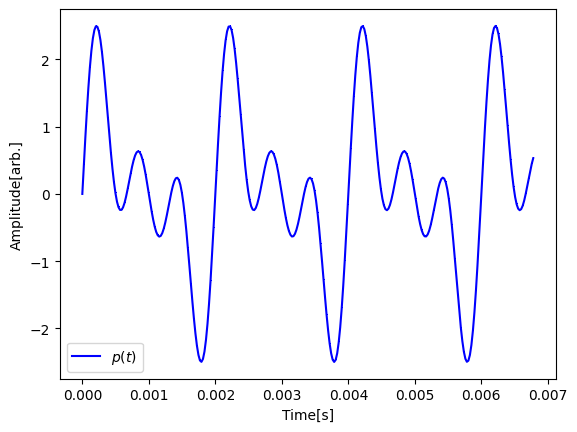

In [10]:
f0 = 500                            # 基本周波数
A = 1                               # 振幅
ph1 = -np.pi / 2                    # 波形1の位相
ph2 = -np.pi / 2                    # 波形2の位相
ph3 = -np.pi / 2                    # 波形3の位相
dt = np.arange(0, 1, 1/fs)          # サンプリング周期
f1 = A*np.cos(2*np.pi*1*f0*dt+ph1)  # 波形1
f2 = A*np.cos(2*np.pi*2*f0*dt+ph2)  # 波形2
f3 = A*np.cos(2*np.pi*3*f0*dt+ph3)  # 波形3
pt = f1 + f2 + f3                   # 合成波

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

さらに各波形の位相項を変えた合成波を聞いてみる。

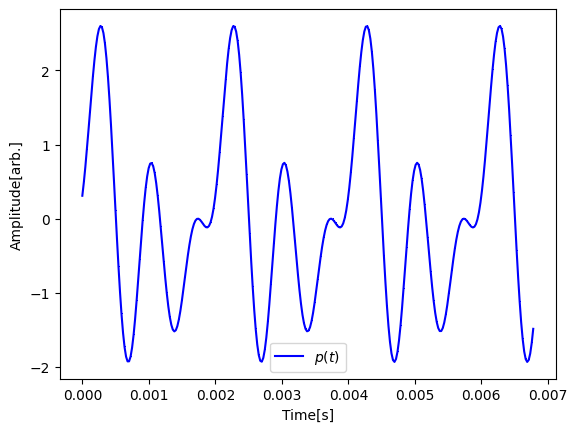

In [11]:
f0 = 500                            # 基本周波数
A = 1                               # 振幅
ph1 = -np.pi / 5                    # 波形1の位相
ph2 = -np.pi / 3                    # 波形2の位相
ph3 = -np.pi / 1                    # 波形3の位相
dt = np.arange(0, 1, 1/fs)          # サンプリング周期
f1 = A*np.cos(2*np.pi*1*f0*dt+ph1)  # 波形1
f2 = A*np.cos(2*np.pi*2*f0*dt+ph2)  # 波形2
f3 = A*np.cos(2*np.pi*3*f0*dt+ph3)  # 波形3
pt = f1 + f2 + f3                   # 合成波

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

位相項を変えるとプロットされた合成波の形は変わるものの、音の変化があまり感じられない。これは聴覚は位相の変化に鈍感であるからである。ただし、鈍感であるものの振幅同様、位相の相違は聞き分けることができる。音声合成についても位相特性を考慮するのが一般的である。

位相を0、すなわちすべての成分をcosの位相で重ね合わせてみる。

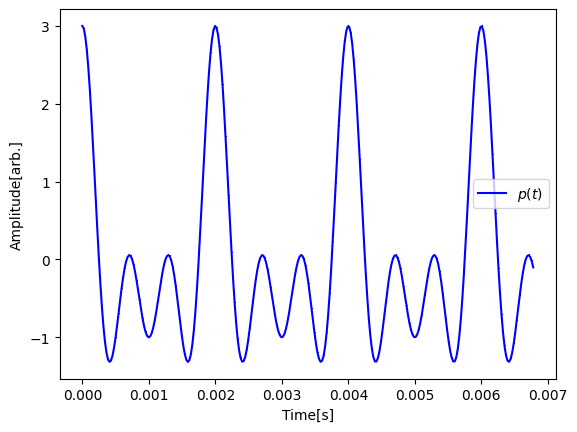

In [12]:
f0 = 500                            # 基本周波数
A = 1                               # 振幅
ph1 = 0                             # 波形1の位相
ph2 = 0                             # 波形2の位相
ph3 = 0                             # 波形3の位相
dt = np.arange(0, 1, 1/fs)          # サンプリング周期
f1 = A*np.cos(2*np.pi*1*f0*dt+ph1)  # 波形1
f2 = A*np.cos(2*np.pi*2*f0*dt+ph2)  # 波形2
f3 = A*np.cos(2*np.pi*3*f0*dt+ph3)  # 波形3
pt = f1 + f2 + f3                   # 合成波

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

鋭い波形が出てくることがわかる。上記は、基本波、第2高調波、第3高調波の重ね合わせだけだが、より高次の高調波を加算していくと**インパルス列**のような特殊な波形に近づいていく。

### 三角関数の合成

cos波とsin波の合成波を見てみる。

$p(t) = A\cos(2\pi{f_0{t}}) + B\sin(2\pi{f_0{t}})$

cos波の振幅Aを1、sin波の振幅Bを0とする。

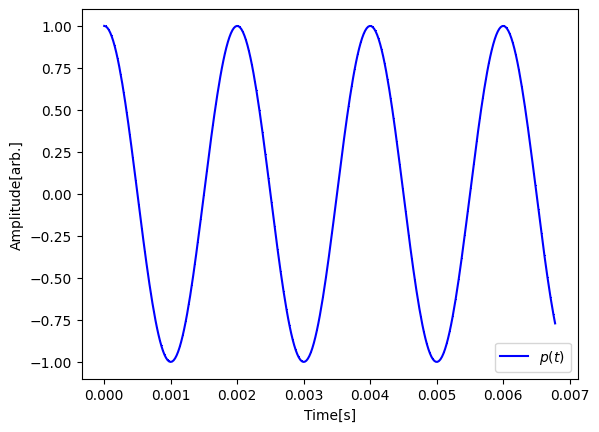

In [13]:
f0 = 500.0                      # 基本周波数
A = 1                           # cos波の振幅
B = 0                           # sin波の振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A*np.cos(2*np.pi*f0*dt)    # cos波
f2 = B*np.sin(2*np.pi*f0*dt)    # sin波
pt = f1 + f2

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

sin波の成分は0なので、cos波そのものであることがわかる。

cos波の振幅Aを1、sin波の振幅Bを1とする。

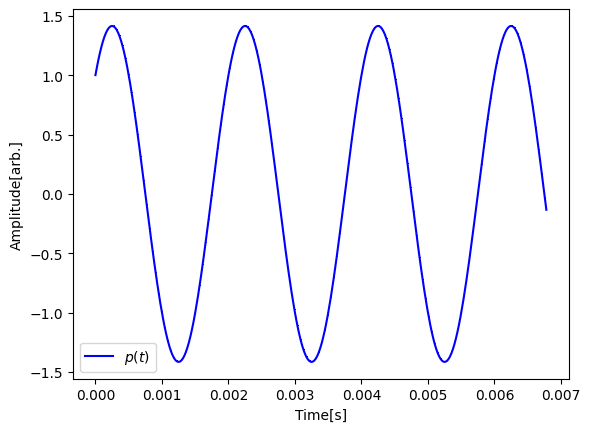

In [14]:
f0 = 500.0                      # 基本周波数
A = 1                           # cos波の振幅
B = 1                           # sin波の振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A*np.cos(2*np.pi*f0*dt)    # sin波
f2 = B*np.sin(2*np.pi*f0*dt)    # sin波
pt = f1 + f2

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

sin波に近づいていることがわかる。

cos波の振幅Aを1、sin波の振幅Bを100とする。

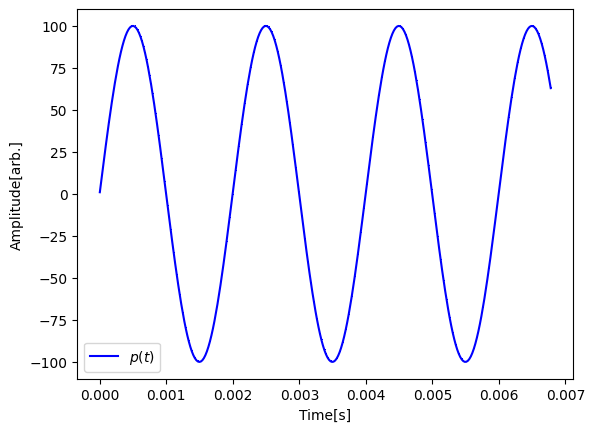

In [15]:
f0 = 500.0                      # 基本周波数
A = 1                           # cos波の振幅
B = 100                         # sin波の振幅
dt = np.arange(0, 1, 1/fs)      # サンプリング周期
f1 = A*np.cos(2*np.pi*f0*dt)    # sin波
f2 = B*np.sin(2*np.pi*f0*dt)    # sin波
pt = f1 + f2

plot_range = 300
plot_wave(dt[0:plot_range], pt[0:plot_range], color = 'b', legend = '$p(t)$')

audio = Audio(pt, rate = fs)
audio

0から始まっており、限りなくsin波に近い波になっていることがわかる。

これは、三角関数より下記のように表すことができるからである。

$A\cos(2\pi{f_0{t}}) + B\sin(2\pi{f_0{t}}) = \sqrt{A^2 + B^2}\cos(2\pi{f_0{t} - \tan^{-1}\frac{B}{A}})$

つまり、振幅$\sqrt{A^2 + B^2}$、位相$\tan^{-1}(\frac{B}{A})$であり、振幅と位相はcos波の振幅Aとsin波の振幅Bによって決まる。

## フーリエ級数展開

### 正弦波で方形波を描く

フーリエ級数展開は、あらゆる周期波形は、その周期を基本周波数とした基本波及びその整数倍の周波数をもつ高調波を重ね合わせることで合成できる、ということを考えた概念である。

波を重ね合わせて方形波を合成してみる。

$
p_1 = \sin(2\pi{f_0}t) \\
p_2 = \sin(2\pi{f_0}t) + \frac{1}{3}\sin(2\pi(3{f_0})t) \\
p_3 = \sin(2\pi{f_0}t) + \frac{1}{3}\sin(2\pi(3{f_0})t) + \frac{1}{5}\sin(2\pi(5{f_0})t)
$

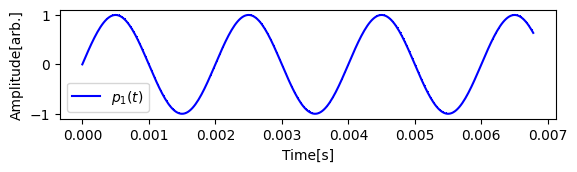

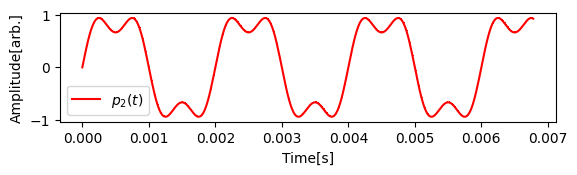

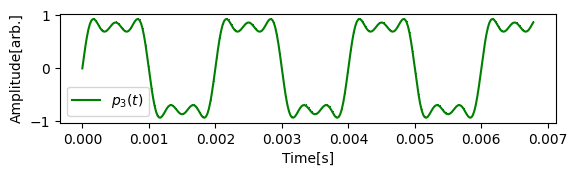

In [16]:
fs = 44100                    # サンプリング周波数
f0 = 500                      # 基本周波数
B1 = 1                        # 波形1の振幅
B2 = 1 / 3                    # 波形2の振幅
B3 = 1 / 5                    # 波形3の振幅
dt = np.arange(0, 1, 1/fs)    # サンプリング周期

f1 = B1*np.sin(2*np.pi*f0*dt)
f2 = B2*np.sin(2*np.pi*3*f0*dt)
f3 = B3*np.sin(2*np.pi*5*f0*dt)

p1 = f1
p2 = f1 + f2
p3 = f1 + f2 + f3

plot_range = 300
plt.subplot(3, 1, 1)
plot_wave(dt[0:plot_range], p1[0:plot_range], color='b', legend='$p_1(t)$')
plt.subplot(3, 1, 2)
plot_wave(dt[0:plot_range], p2[0:plot_range], color='r', legend='$p_2(t)$')
plt.subplot(3, 1, 3)
plot_wave(dt[0:plot_range], p3[0:plot_range], color='g', legend='$p_3(t)$')

audio = Audio(p3, rate=fs)
audio

徐々に角張った波形になっていることがわかる。

ここで、第n高調波を出力する関数を定義してみる。

$\frac{1}{n}\cos(2\pi(n{f_0})t)$

In [17]:
def func_nth_harmonic(n, f0, t):
    """
    第n高調波の波形の定義
    """
    return((1/n)*np.sin(2*np.pi*(n*f0)*t))

第15高調波までの奇数次の波形を加算してみる。

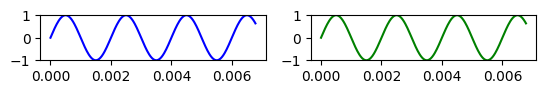

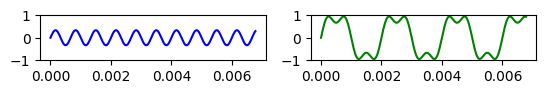

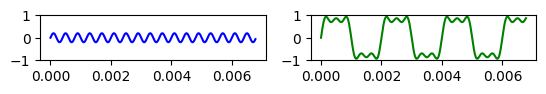

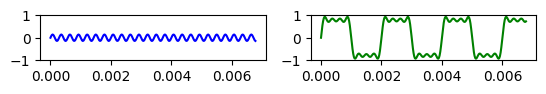

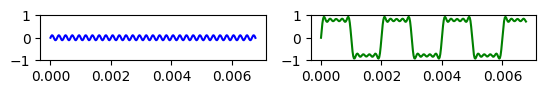

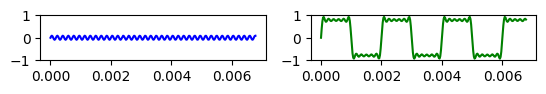

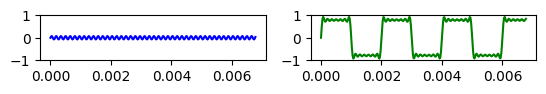

In [18]:
f0 = 500                                # 基本周波数
dt = np.arange(0, 1, 1/fs)              # サンプリング周期
n_start = 1                             # 最低次の高調波
n_end   = 15                            # 最高次の高調波
n_skip  = 2                             # 高調波の次数のスキップ幅(奇数)
n_rows = int((n_end-n_start) / n_skip)  # プロットする行数(加算する高調波数)
row = 0                                 # 行数
sum = np.zeros(len(dt))                 # 初期化
plot_range = 300

for n in range(n_start, n_end, n_skip):
    row += 1
    nth_harmonic = func_nth_harmonic(n, f0, dt)
    sum += nth_harmonic
    ax = plt.subplot(n_rows, 2, 2*row-1)
    plt.plot(dt[0:plot_range], nth_harmonic[0:plot_range], color='b')
    plt.ylim(-1.0, 1.0)
    ax = plt.subplot(n_rows, 2, 2*row)
    plt.plot(dt[0:plot_range], sum[0:plot_range], color='g')
    plt.ylim(-1.0, 1.0)
    plt.show()

方形波に近づいているが、途中から同じような形が続いている。そこで、第51高調波まで加算してみる。

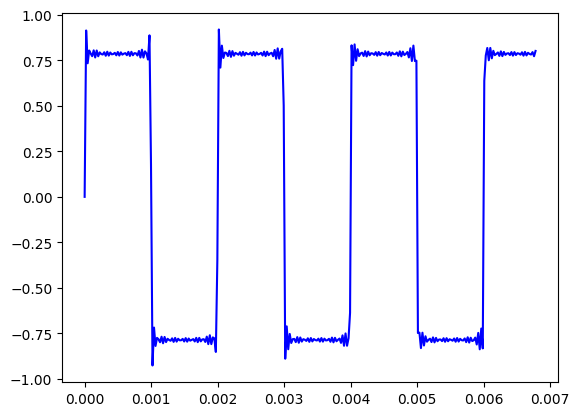

In [19]:
n_start = 1     # 最低次の高調波
n_end   = 51    # 最高次の高調波
n_skip  = 2     # 高調波の次数のスキップ幅(奇数)
sum = np.zeros(len(dt))

for n in range(n_start, n_end, n_skip):
    nth_harmonic = func_nth_harmonic(n, f0, dt)
    sum += nth_harmonic

plot_range = 300
plt.plot(dt[0:plot_range], sum[0:plot_range], color='b')
plt.show()

次に第101高調波まで加算してみる。

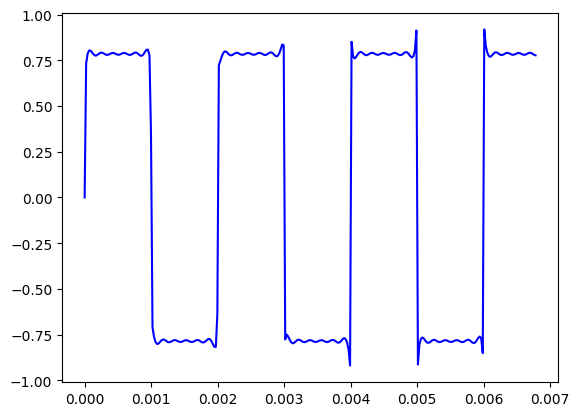

In [20]:
n_start = 1     # 最低次の高調波
n_end   = 101   # 最高次の高調波
n_skip  = 2     # 高調波の次数のスキップ幅(奇数)
sum = np.zeros(len(dt))

for n in range(n_start, n_end, n_skip):
    nth_harmonic = func_nth_harmonic(n, f0, dt)
    sum += nth_harmonic

plot_range = 300
plt.plot(dt[0:plot_range], sum[0:plot_range], color='b')
plt.show()

次に第201高調波まで加算してみる。

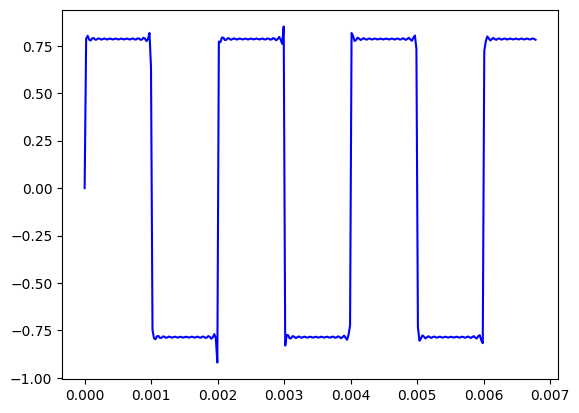

In [21]:
n_start = 1     # 最低次の高調波
n_end   = 201   # 最高次の高調波
n_skip  = 2     # 高調波の次数のスキップ幅(奇数)
sum = np.zeros(len(dt))

for n in range(n_start, n_end, n_skip):
    nth_harmonic = func_nth_harmonic(n, f0, dt)
    sum += nth_harmonic

plot_range = 300
plt.plot(dt[0:plot_range], sum[0:plot_range], color='b')
plt.show()

高次数の正弦波を用いて方形波に近づけることができた。ただし、所々でつの（**オーバーシュート**）のような波形の不連続点が残ってしまう。これを**Gibbs現象**という。方形波では、方形波の振幅の役18%のオーバーシュートが生じることが知られている。また、加算する高調波の次数を無限に高くすると、オーバーシュートの高さは変わらないままで幅が狭くなり、最終的にオーバーシュートが見えなくなり、方形波に収束することが知られている。

### 周期波形の分解

フーリエ級数展開は、あらゆる周期波形は、その周期を基本周波数とした基本波及びその整数倍の周波数をもつ高調波に分解でき、周期波形が異なれば、それらの基本波と高調波の振幅、位相が異なる。つまり、ある周期波形$f(t)$が与えられたとき、その中に含まれる第n高調波（n=1は基本波）の振幅と位相を求めることができる。

まず、$A\cos(2\pi{f{t}}) + B\sin(2\pi{f{t}})$について考えてみる。

第n高調波のcos成分の振幅$A_n$とsin成分の振幅$B_n$は、それぞれ下記の式で求めることができる。

$
A_n = \frac{2}{T_0} \int^{T_0}_{0}f(t)\cos{(2\pi{nf_0{t}})dt} \\
B_n = \frac{2}{T_0} \int^{T_0}_{0}f(t)\sin{(2\pi{nf_0{t}})dt}
$

第3高調波のcos成分のみを含む波形、$f(t) = 3\cos(2\pi(2f_0)t)$の波形で試してみる。この場合、sin成分は含まれないので$B_n = 0$となる。また、$A_3 = 3$で、その他は、$A_0 = A_1 = A_2 = A_4 = A_5 = 0$となるはずである。また、積分を和で近似する精度が高くなるようにサンプリング周波数は、100[MHz]とする。

まずは、n = 1（基本波）の振幅$A_1$を求める。

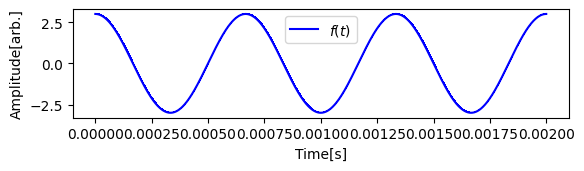

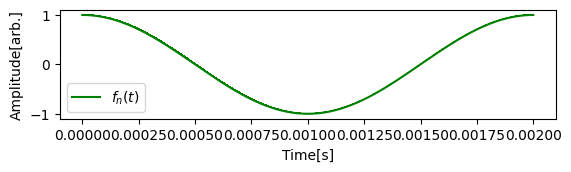

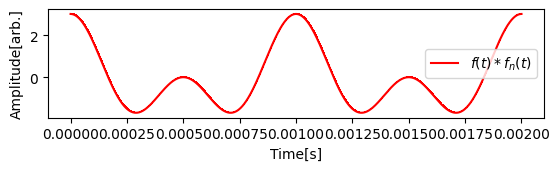

A1 = -2.5465851649641993e-16


In [22]:
fs = 100e6                      # サンプリング周波数(100[MHz])
f0 = 500                        # 基本周波数
T0 = 1/f0                       # 基本周期
t = np.arange(0, T0, 1/fs)      # サンプリング点(基本周期分)

f = 3*np.cos(2*np.pi*(3*f0)*t)

# A_nを計算
n = 1
f_n = np.cos(2*np.pi*n*f0*t)
f2 = f * f_n

plt.subplot(3, 1, 1)
plot_wave(t[0:len(t)], f[0:len(t)], color='b', legend=u'$f(t)$')
plt.subplot(3, 1, 2)
plot_wave(t[0:len(t)], f_n[0:len(t)], color='g', legend=u'$f_n(t)$')
plt.subplot(3, 1, 3)
plot_wave(t[0:len(t)], f2[0:len(t)], color='r', legend=u'$f(t) * f_n(t)$')

# 2/T_0 の係数は，2/(区間の点数) で近似
A1 = 2 / len(t) * np.sum(f2[0:len(t)])
print("A1 =", A1)

指数表記でe-16なので限りなく0に近い値になっている。

次に n = 2 の振幅$A_2$を求める。

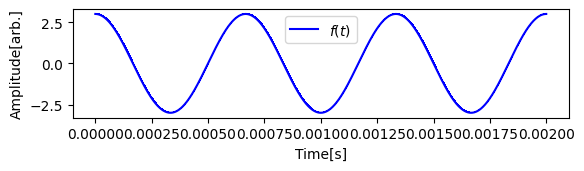

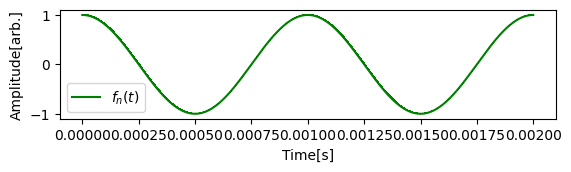

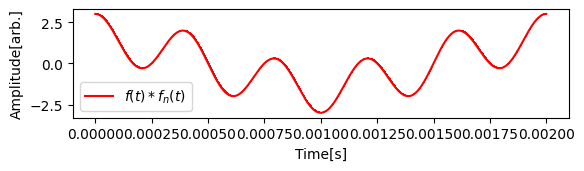

A2 = 1.091393642127514e-16


In [23]:
fs = 100e6                      # サンプリング周波数(100[MHz])
f0 = 500                        # 基本周波数
T0 = 1/f0                       # 基本周期
t = np.arange(0, T0, 1/fs)      # サンプリング点(基本周期分)
f = 3*np.cos(2*np.pi*(3*f0)*t)

# A_nを計算
n = 2
f_n = np.cos(2*np.pi*n*f0*t)
f2 = f * f_n

plt.subplot(3, 1, 1)
plot_wave(t[0:len(t)], f[0:len(t)], color='b', legend=u'$f(t)$')
plt.subplot(3, 1, 2)
plot_wave(t[0:len(t)], f_n[0:len(t)], color='g', legend=u'$f_n(t)$')
plt.subplot(3, 1, 3)
plot_wave(t[0:len(t)], f2[0:len(t)], color='r', legend=u'$f(t) * f_n(t)$')

# 2/T_0 の係数は，2/(区間の点数) で近似
A2 = 2 / len(t) * np.sum(f2[0:len(t)])
print("A2 =", A2)

同じく指数表記でe-16なので限りなく0に近い値になっている。

次に n = 3 の振幅$A_3$を求める。

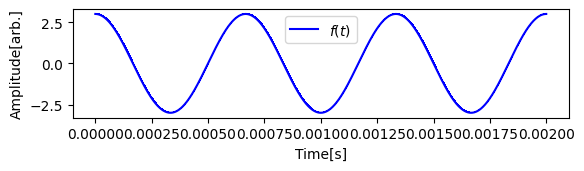

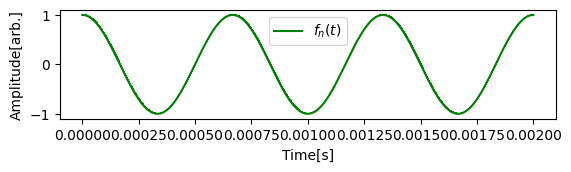

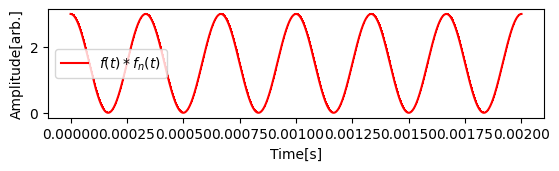

A3 = 2.9999999999999996


In [24]:
fs = 100e6                      # サンプリング周波数(100[MHz])
f0 = 500                        # 基本周波数
T0 = 1/f0                       # 基本周期
t = np.arange(0, T0, 1/fs)      # サンプリング点(基本周期分)

f = 3*np.cos(2*np.pi*(3*f0)*t)

# A_nを計算
n = 3
f_n = np.cos(2*np.pi*n*f0*t)
f2 = f * f_n

plt.subplot(3, 1, 1)
plot_wave(t[0:len(t)], f[0:len(t)], color='b', legend=u'$f(t)$')
plt.subplot(3, 1, 2)
plot_wave(t[0:len(t)], f_n[0:len(t)], color='g', legend=u'$f_n(t)$')
plt.subplot(3, 1, 3)
plot_wave(t[0:len(t)], f2[0:len(t)], color='r', legend=u'$f(t) * f_n(t)$')

# 2/T_0 の係数は，2/(区間の点数) で近似
A3 = 2 / len(t) * np.sum(f2[0:len(t)])
print("A3 =", A3)

ちゃんと、第3高調波の振幅3に近似された値が求めることができた。

よく観察してみると、$n = 3$以外のときは、積の波形が正負の値をとっており、正の部分と負の部分の面積がほぼ相殺されているため、近似値が0をとる。一方で、$%n = 3$のときは、常に正の値をとる。このことは、**三角関数の直交性**で説明できる。

### 分解された成分の位相と振幅

$A_n$、$B_n$が求められるようになれば、下記の式から基本波及び第n高調波の振幅と位相を調べることができる。

三角関数の合成公式(cos) $ a \sin \theta + b \cos \theta = \sqrt{a^2 + b^2} \cos(\theta - \beta) $ とアークタンジェントより、

$A\cos(2\pi{f_0{t}}) + B\sin(2\pi{f_0{t}}) = \sqrt{A^2 + B^2}\cos(2\pi{f_0{t} - \tan^{-1}\frac{B}{A}})$

ここで、複素数$D_n$を用いて、$D_n = A_n -jB_n$と定義すると、第n高調波の振幅$|D_n|$と位相$\phi_n = Arg[D_n]$ は次式で表現することができる。ただし、$A_n > 0$と仮定。

$
|D_n| = \sqrt{A^2_n + B^2_n} \\
Arg[D_n] = -tan^{-1}\frac{B_n}{A_n}
$

※ここで、$Arg$はガウス平面（複素平面）において複素数zと実軸とをなす角、つまり偏角(argument)のこと。

式をまとめると、

$
f(t) = \sum^{\infty}_{n=1}\{A\cos(2\pi{f_0{t}}) + B\sin(2\pi{f_0{t}})\}
= \sum^{\infty}_{n=1}\{\sqrt{A^2 + B^2}\cos(2\pi{f_0{t} - \tan^{-1}\frac{B}{A}})\}
$

方形波の場合は、

$
A_n = 0 \\
B_n = \frac{1}{n} (nが奇数の場合)\\
B_n = 0 (nが偶数の場合)
$

または、

$
|D_n| = \frac{1}{n} (nが奇数の場合)\\
|D_n| = 0 (nが偶数の場合) \\
\phi_n = -\frac{\pi}{2} (nによらない定数。ただし、nが偶数の場合は振幅が0となるので意味がない。)
$


## スペクトル

スペクトルは、ある波形に、どの周波数成分が、どれくらいの振幅で、どれくらいの位相で含まれているのかを表すもの。

スペクトルをプロットする関数を定義する。

In [25]:
def plot_spectrum(f0, amp, ph, n_max=10, level=False, plot_range=60):
    """
    @Param f0           : 基本周波数
    @Param amp          : 振幅
    @Param ph           : 位相
    @Param n_max        : 横軸範囲
    @Param level        : True -> 縦軸を相対レベル[dB]表示
    @Param plot_range   : 縦軸範囲(デフォルト : 60[dB])
    """
    if (len(amp) < n_max):
        n_max = len(amp)

    freq = f0*np.arange(1, n_max+1) # 基本周波数とその整数倍の周波数の配列

    ''' 振幅スペクトル '''
    xtitle = 'Frequency[Hz]'
    ytitle = 'Amplitude[arb.]'

    if (level == True):
        # 振幅が0の場合にlogの計算エラーが出ないよう、計算機イプシロン(1より大きい最小の数)を加算
        amp = amp + np.finfo(float).eps
        amp = 20*np.log10(np.abs(amp[0:n_max])/np.max(amp[0:n_max]))    # 最大振幅を0[dB]とした相対レベルを計算
        amp = amp + plot_range                                          # stemの描画のため描画範囲を加算
        amp[amp < 0] = 0                                                # plot_range未満は0
        ytitle = 'Relative level[dB]'

    plt.subplot(2, 1, 1)
    plt.stem(freq , amp[0:n_max])
    plt.xlim(0.0, f0 * (n_max + 1))
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)

    if (level == True):
        # plot_rangeの値を加算した分を差し引いた数値
        plt.yticks([i for i in range(0, int(plot_range) + 1, 10)], [str(i) for i in range(-int(plot_range), 0+1, 10)])

    ''' 位相スペクトル '''
    ytitle = 'Phase (rad)'
    plt.subplot(2, 1, 2)
    plt.stem(freq, ph[0:n_max])
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.xlim(0.0, f0 * (n_max + 1))
    plt.ylim(-np.pi, np.pi)
    plt.yticks([-np.pi, -np.pi/2.0, 0, np.pi/2.0, np.pi], ["$-\pi$", "$-\pi/2$" ,"0", "$\pi/2$", "$\pi$"])
    plt.show( )

### 実フーリエ級数展開のスペクトルを描画

以前、使っていた方形波をのスペクトルを求めてみる。基本周波数は500[Hz]で、$p(t) = \sin(2\pi{f_0}t) + \frac{1}{3}\sin(2\pi(3{f_0})t) + \frac{1}{5}\sin(2\pi(5{f_0})t) \cdots$で、第10高調までを求めてみる。

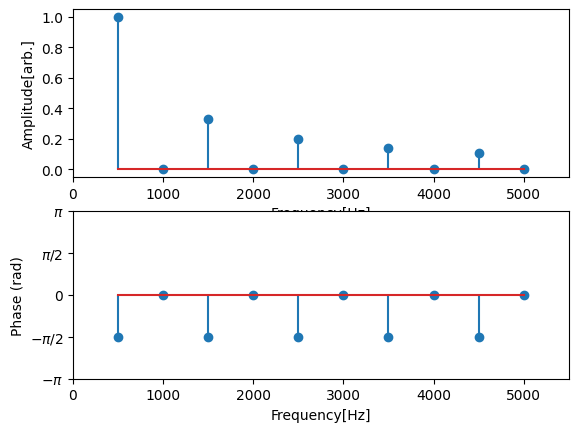

In [26]:
f0 = 500    # 基本周波数
n_max = 10  # 最大次数

# sin成分しかないためAn=0
An = np.zeros(n_max)
# 1/n(奇数次のみ)計算
Bn = np.array([1/n if n%2!=0 else 0 for n in range(1, n_max+1)])
# 振幅計算
Dn = np.sqrt(An**2 + Bn**2)
# 位相計算
ph = -np.arctan(Bn / (An + np.finfo(float).eps))

plot_spectrum(f0, Dn, ph)

縦軸を相対レベル[dB]で表示してみる。

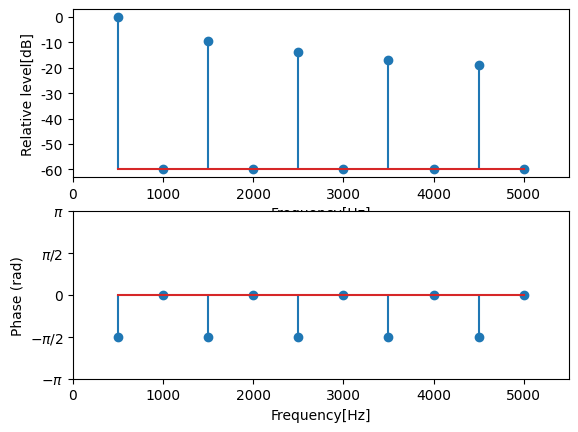

In [27]:
plot_spectrum(f0, Dn, ph, level=True)

振幅のデータだと、第5高調波くらいになると無視しても構わないような小さな値に見えるが、相対レベルで見るとまだ影響が大きいように見える。音の知覚の性質を考えると、縦軸は相対レベルでプロットするのが適切な場合が多い。

### 複素フーリエ級数展開

実フーリエ級数展開をオイラーの定理を使って複素フーリエ級数展開で表現する。$e^{j\theta}$は、**複素正弦波**といい、次のように表すことができる。

$e^{j\theta} = \cos(\theta)  + j\sin(\theta)$

複素正弦波を用いると、フーリエ級数展開は次のように表すことができる。

$f(t) = \Sigma^{\infty}_{n = -\infty}C_{n}e^{j2\pi{nf_0}t}$

ただし、nを自然数としたとき、$C_{n} = (A_{n} - jB_{n})/2$と定義し、$C_{-n} = (A_{n} + jB_{n})/2$と定義する。

また、$C_{n}e^{j2\pi{nf_0}t}$とその複素共役$C_{-n}e^{-j2\pi{nf_0}t}$は、常に虚部をキャンセルする関係にあるため、計算結果は実数になる。

複素フーリエ級数展開で表現することのメリットは、実フーリエ級数展開だと、三角関数で$\sin(2\pi{f}t)$、$\cos(2\pi{f}t)$をtについて微分すると、$\sin(2\pi{f}t)$→$2\pi{f}\cos(2\pi{f}t)$→$\cos(2\pi{f}t)$→$2\pi{f}\sin(2\pi{f}t)$、といったように書き換えが必要になるが、複素フーリエ級数展開の場合は、複素指数関数$e^{j2\pi{nft}}$を微分すると、$j2\pi e^{j2\pi nft}$、となり係数の変化だけで表現できる（積分についても同様）。

$e^{-j2\pi{nft}} = e^{j2\pi{(-n)ft}}$ と変形できるため、あたかも$−nf_0$という負の周波数をもつ成分とみなすことができる（実際は負の周波数はなく、あくまで，式の上での便宜上の解釈）。よって、複素フーリエ級数展開で求められるスペクトルを描画する際は，周波数を正負の領域に広げて描く。

複素フーリエ級数展開において、振幅と位相はどのように表されるかを考える。

まず、$C_n = \frac{A_n - j B_n}{2}$ という複素数について、絶対値（複素平面における原点からの距離）$|C_n|$と偏角（実軸からの回転角）$Arg[C_n]$ を求めてみる。

$
|C_n| = \sqrt{(\frac{A_n}{2})^2 + ( \frac{B_n}{2})^2 } = \frac{\sqrt{A_n^2 + B_n^2}}{2} = \frac{| D_n |}{2} \\
Arg[C_n] = \tan^{-1} \frac{-B_n/2}{A_n/2} = -\tan^{-1} \frac{B_n}{A_n} = \phi_n
$

よって、$|C_n|$ は振幅のデータ $|D_n|$ を $1/2$ にしたものであることがわかる。これは、本来の振幅 $|D_n|$ を正・負の周波数成分に分け合っていることによる。実際、$C_n e^{j 2 \pi n f_0 t}$とその複素共役 $\hat{C}_n e^{-j 2 \pi n f_0 t}$ を足すと、虚部はキャンセルされるが、実部は 2 倍になるため，本来の振幅が保たれていることがわかる。一方，$Arg[C_n]$ は位相データそのものである。よって、正の周波数については、$C_n = \frac{1}{2}|D_n| e^{j \phi_n}$と表すことができる。一方、$ C_{-n} = \hat{C}_n$ なので、負の周波数の場合（nが負の場合）は、偏角の符号を反転する必要がある。

以上より、複素フーリエ級数展開によって求めた $C_n$（複素フーリエ級数展開係数）の絶対値$|C_n|$と偏角 $Arg[C_n]$ を縦軸、周波数を横軸に描いたグラフが、それぞれ**振幅スペクトル**と**位相スペクトル**となる。

最後に、$f(t)$ が与えられたとき、$C_n$ をどのように求めるかを考える。定義は、$C_n = \frac{A_n - j B_n}{2}$なので、$A_n$ と $B_n$ を求める式を代入するだけとなる。

$
C_n = \frac{1}{2} (A_n -j B_n) \\
    = \frac{1}{2} \{ \frac{2}{T_0} \int_0^{T_0}\  f(t) \cos (2 \pi n f_0 t) \ dt -j \frac{2}{T_0} \int_0^{T_0}\  f(t) \sin (2 \pi n f_0 t) \ dt \} \\
    = \frac{1}{T_0}  \int_0^{T_0}\  f(t) \{ \cos (2 \pi n f_0 t)  -j  \sin (2 \pi n f_0 t) \} \ dt \\
    = \frac{1}{T_0}  \int_0^{T_0}\  f(t)\  e^{-j2 \pi n f_0 t} \ dt \\
$

### 複素フーリエ級数展開でスペクトルを描画

複素フーリエ級数展開でスペクトルをプロットする関数を定義する。

In [28]:
def plot_cmplx_spectrum(f0, Cn, n_max=10, level=False, plot_range=60):
    """
    @Param f0           : 基本周波数
    @Param Cn           : 複素フーリエ級数展開係数
    @Param n_max        : 横軸範囲
    @Param level        : True -> 縦軸を相対レベル[dB]表示
    @Param plot_range   : 縦軸範囲(デフォルト : 60[dB])
    """

    # データのインデックス
    start = 0
    end = 2*n_max + 1

    if ((len(Cn)-1)/2 < n_max):
        n_max = int((len(Cn)-1)/2)              # 与えられた次数までプロット
    elif ((len(Cn)-1)/2 > n_max):
        start = int((len(Cn)-1)/2) - n_max      # 指定された範囲のみ
        end = int((len(Cn)-1)/2) + (n_max+1)    # 開始と終了インデックスを計算

    amp = np.abs(Cn[int(start):int(end)])
    phi = np.angle(Cn[int(start):int(end)])

    freq = f0 * np.arange(-n_max, n_max + 1) # 基本周波数と高調波の周波数の配列

    ''' 振幅スペクトル '''
    xtitle = 'Frequency[Hz]'
    ytitle = 'Amplitude[arb.]'

    if (level == True):
        # 振幅が0の場合にlogの計算エラーが出ないよう、計算機イプシロン(1より大きい最小の数)を加算
        amp = amp + np.finfo(float).eps
        amp[amp < 0] = 0                                                    # plot_range未満は0
        amp = 20*np.log10(np.abs(amp[0:n_max*2+1])/np.max(amp[0:n_max]))    # 最大振幅を0[dB]とした相対レベルを計算
        amp = amp + plot_range                                              # stemの描画のため描画範囲を加算
        amp[amp < 0] = 0                                                    # plot_range未満は0
        ytitle = 'Relative level[dB]'

    plt.subplot(2, 1, 1)
    plt.stem(freq, amp[0:2*n_max + 1])
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)

    if (level == True):
        # plot_rangeの値を加算した分を差し引いた数値
        plt.yticks([i for i in range(0, int(plot_range)+1, 10)], [str(i) for i in range(-int(plot_range), 0+1, 10)])

    ''' 位相スペクトル '''
    ytitle = 'Phase (rad)'
    plt.subplot(2, 1, 2)
    plt.stem(freq, phi[0:2*n_max+1])
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.ylim(-np.pi, np.pi)
    plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ["$-\pi$", "$-\pi/2$" ,"0", "$\pi/2$", "$\pi$"])
    plt.show()

def realAnBn_to_cmplxCn(An, Bn):
    """
    実スペクトル(A_n, B_n)から複素スペクトル(C_n)を求める関数
    """
    Cn_plus = (An-1j*Bn)/2              # 正の周波数は、C_nを計算
    Cn_minus = np.conj(Cn_plus[::-1])   # 負の周波数は、配列を逆順に納めて複素共役へ
    C0 = np.array([0.0])                # 直流成分は、0
    Cn = np.r_[Cn_minus, C0, Cn_plus]   # 各成分を連結
    return (Cn)

方形波の複素フーリエ級数展開のスペクトルをプロットしてみる。

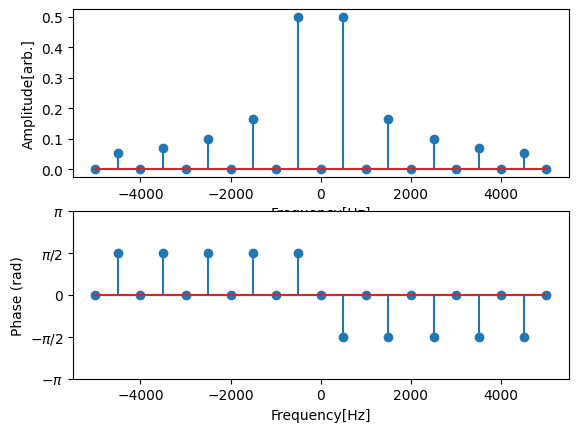

In [29]:
f0 = 500    # 基本周波数
n_max = 10  # 最大次数

# sin成分しかないためAn=0
An = np.zeros(n_max)
# 1/n(奇数次のみ)計算
Bn = np.array([1/n if n%2!=0 else 0 for n in range(1, n_max+1)])

Cn = realAnBn_to_cmplxCn(An, Bn)
plot_cmplx_spectrum(f0, Cn)

実フーリエ級数展開のスペクトルをもう一度プロットし、複素フーリエ級数展開のスペクトルと比べてみる。

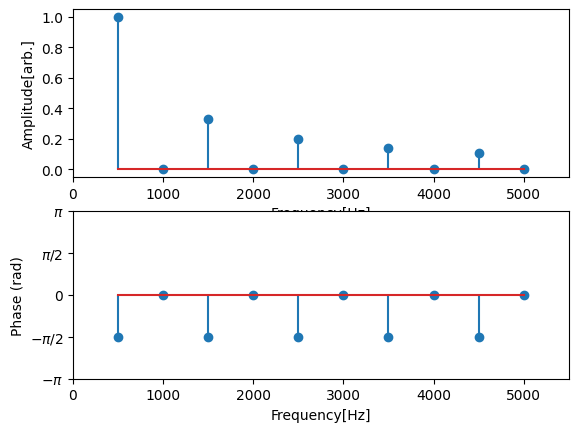

In [30]:
# 振幅計算
Dn = np.sqrt(An**2 + Bn**2)
# 位相計算
ph = -np.arctan(Bn / (An + np.finfo(float).eps))

plot_spectrum(f0, Dn, ph)

複素フーリエ級数展開のスペクトルは、正の周波数に着目すると、複素フーリエ級数展開のスペクトルの振幅の値が、実フーリエ級数展開の半分になっている。しかし、それ以外は同じである。位相スペクトルに関しては全く同じである。負の周波数成分は、振幅スペクトルは必ず**偶関数**となり、位相スペクトルは必ず**奇関数**となる。これは、$C_{-n} = \hat{C_{n}}$と定義しているため、振幅である複素数$C_n$の絶対値は、正負の周波数で等しく、位相である複素数$C_n$の偏角は進み、遅れが反転する。

次に、振幅スペクトルを相対レベル[dB]でプロットしてみる。

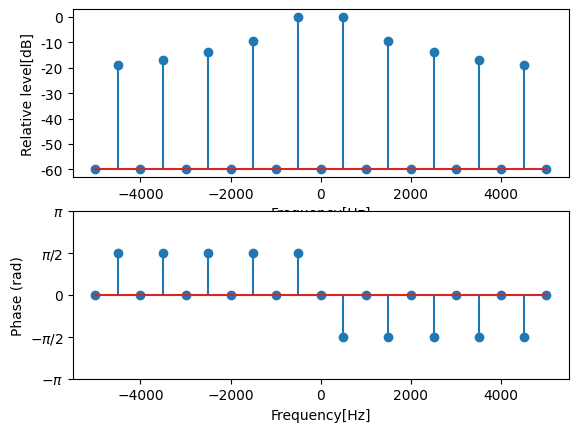

In [31]:
plot_cmplx_spectrum(f0, Cn, level=True)

実フーリエ級数展開の振幅スペクトルの相対レベル表示と比べてみる。

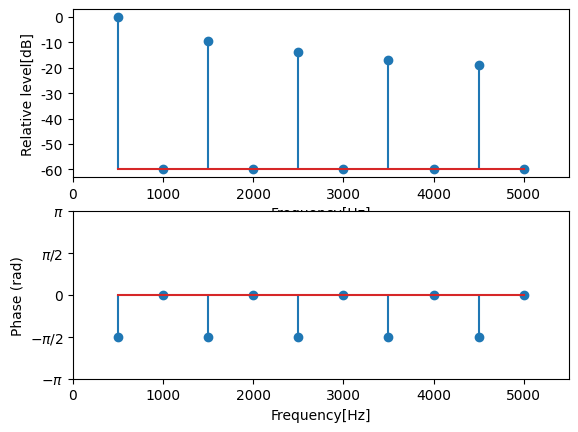

In [32]:
plot_spectrum(f0, Dn, ph, level=True)

相対レベル表示については、全く同じである。これは、縦軸が最大値を基準とした相対レベルであるため、全体的に振幅が下がっていても相対レベルとしては変化しない。

以上より、第n高調波におけるcos波、sin波の振幅$A_n$、$B_n$さえ与えられれば、スペクトルがプロットがわかった。

### 基本的な周期波形のスペクトル

基本的な周期波形$\cos(2 \pi ft)$のスペクトルを見てみる。基本周波数は500[Hz]で、基本周波数成分のみの振幅$A_n$を1とする。

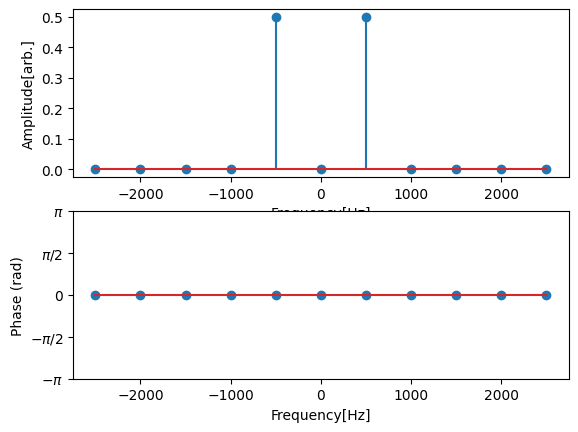

In [33]:
f0 = 500            # 基本周波数
An = np.zeros(5)    # An初期化(第5高調波まで)
Bn = np.zeros(5)    # Bn初期化(第5高調波まで)
An[0] = 1           # 基本周波数の振幅Anのみを1へ

Cn = realAnBn_to_cmplxCn(An, Bn)
plot_cmplx_spectrum(f0, Cn)

振幅1が正負の周波数に半分ずつの0.5となっている。また、cos波の位相は0[rad]となっている。

次に、基本的な周期波形$\sin(2 \pi ft)$のスペクトルを見てみる。基本周波数は500[Hz]で、基本周波数成分のみの振幅$B_n$を1とする。

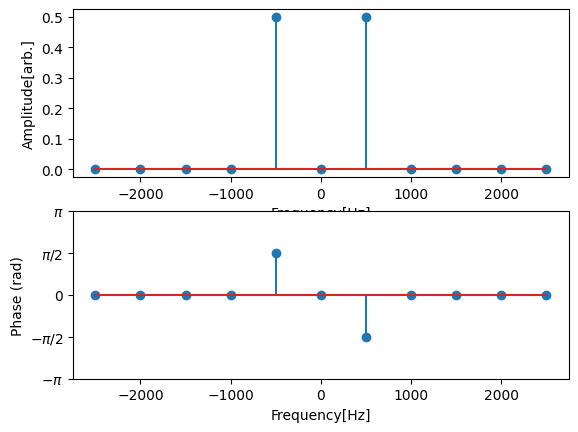

In [34]:
f0 = 500            # 基本周波数
An = np.zeros(5)    # An初期化(第5高調波まで)
Bn = np.zeros(5)    # Bn初期化(第5高調波まで)
Bn[0] = 1           # 基本周波数の振幅Bnのみを1へ

Cn = realAnBn_to_cmplxCn(An, Bn)
plot_cmplx_spectrum(f0, Cn)

sin波もちゃんと振幅1が正負の周波数に半分ずつの0.5になっている。また、sin波なので位相は$-\pi / 2$[rad]（遅れ）となっている。負の周波数のほうは、複素フーリエ級数展開係数$C_{1}$が以下のように$-j/2$となり、$C_{-1}$の複素共役となるので、$\pi / 2$となる。

$C_{1} = \frac{(A_1 -jB_1)}{2} = \frac{(0 -jB_1)}{2} = -\frac{j}{2}$


次に、$\cos(2\pi{f_0{t}}) + \sin(2\pi{f_0{t}})$を考えてみる。

$A\cos(2\pi{f_0{t}}) + B\sin(2\pi{f_0{t}}) = \sqrt{A^2 + B^2}\cos(2\pi{f_0{t} - \tan^{-1}\frac{B}{A}})$　より、
$\cos(2\pi{f_0{t}}) + \sin(2\pi{f_0{t}}) = \sqrt{2}\cos(2\pi{f_0{t} - {\frac{\pi}{4}}})$

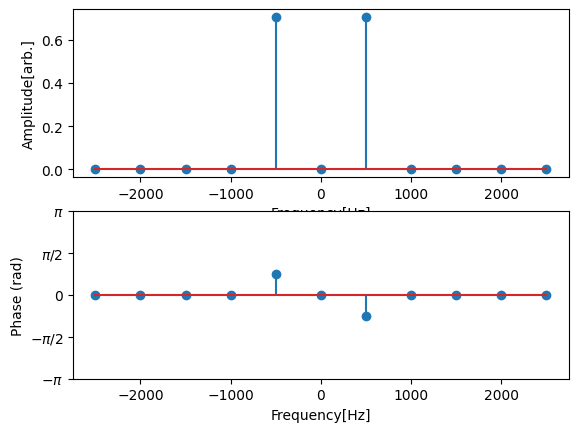

In [35]:
f0 = 500            # 基本周波数
An = np.zeros(5)    # An初期化(第5高調波まで)
Bn = np.zeros(5)    # Bn初期化(第5高調波まで)
An[0] = Bn[0] = 1   # 基本周波数の振幅An及びBnを1へ

Cn = realAnBn_to_cmplxCn(An, Bn)
plot_cmplx_spectrum(f0, Cn)

振幅は、$\sqrt{2}$が半分ずつの$\sqrt{2}/2$となって正負の周波数に表れている。位相については、正の周波数の方では$-\pi/4$（遅れ）、負の周波数のほ方では$\pi/4$（進み）となっている。また、ちゃんと振幅スペクトルは偶関数となり、位相スペクトルは奇関数となっていることがわかる。

その他の波形のスペクトルも確認してみる。

#### 波形1
$p (t) = 2 \cos (2 \pi f_0 t) - \sin (2 \pi f_0 t)$



波形の式から下記が求められる。

$ A_1 = 2, B_1 = -1 $

$ C_n = \frac{1}{2} (A_n -j B_n) $より、

$ C_1 = \frac{1}{2} (2 -j (-1)) = \frac{1}{2} (2 + j1) $

$ C_{-1} = \frac{1}{2} (2 - j1) (複素共役)$

$ |C_n| = \sqrt{(\frac{A_n}{2})^2 + ( \frac{B_n}{2})^2 } = \frac{\sqrt{A_n^2 + B_n^2}}{2} = \frac{| D_n |}{2} より、|C_n| = \frac{\sqrt{2^2 + (-1)^2}}{2} \simeq 1.118 $



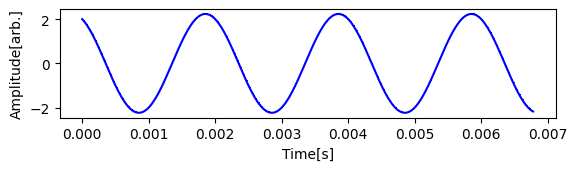

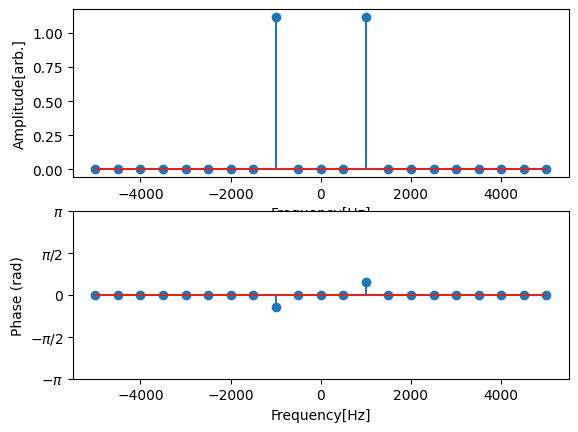

[0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  1.-0.5j
 0.-0.j  0.+0.j  0.+0.j  1.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
 0.+0.j  0.+0.j  0.+0.j ]


In [37]:
fs = 44100  # サンプリング周波数
f0 = 500    # 基本周波数
A1 = 2      # 振幅A1
B1 = -1     # 振幅B1

dt = np.arange(0, 1, 1/fs)
pt = A1*np.cos(2*np.pi*f0*dt) + B1*np.sin(2*np.pi*f0*dt)

plt.subplot(3, 1, 1)
plot_wave(dt[0:300], pt[0:300])

n_max = 10  # 第10高調波までプロット
An = np.zeros(n_max)
Bn = np.zeros(n_max)
An[1] = 2   # 振幅A1
Bn[1] = -1  # 振幅B1
Cn = realAnBn_to_cmplxCn(An, Bn)
plot_cmplx_spectrum(f0, Cn)
print(Cn)

#### 波形2

$p (t) = 2 \sqrt{5} \cos \left( 2 \pi f_0 t - \tan^{-1} \frac{1}{2} \right) + \sqrt{5} \cos \left( 2 \pi (2 f_0) t + \tan^{-1} 2 \right)$

$|D_n|$ と $\phi_n$ を読み取る。基本波 $n=1$ と第2高調波 $n=2$ が含まれている。
+ 基本波：$|D_1| = 2 \sqrt{5}$, $\phi_1 = - \tan^{-1} \frac{1}{2}$
+ 第2高調波：$|D_2| = \sqrt{5}$, $\phi_2 =  \tan^{-1} 2$

よって、
+ $C_1 = \frac{1}{2}(2 \sqrt{5}) \exp(-j \tan^{-1} \frac{1}{2}) = \sqrt{5} \exp(-j \tan^{-1} \frac{1}{2})$, $C_{-1} =\sqrt{5} \exp(j \tan^{-1} \frac{1}{2})$
+ $C_2 = \frac{1}{2}\sqrt{5} \exp(j \tan^{-1} 2)$, $C_{-2} =\frac{\sqrt{5}}{2} \exp(-j \tan^{-1} 2)$

In [40]:
def set_cmplxC(Cn_half):
    """
    複素スペクトルをセットする関数
    """
    Cn_plus = Cn_half[1: ]              # 正の周波数は与えられたCnを埋める
    Cn_minus = np.conj(Cn_plus[ : :-1]) # 負の周波数は複素共役(逆順)
    C0 = Cn_half[0]
    Cn = np.r_[Cn_minus, C0, Cn_plus]   # 各成分Cn
    return (Cn)

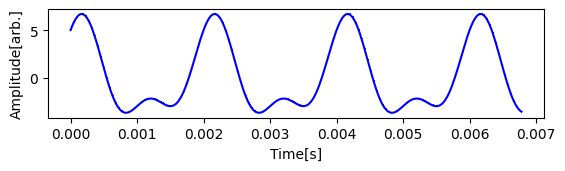

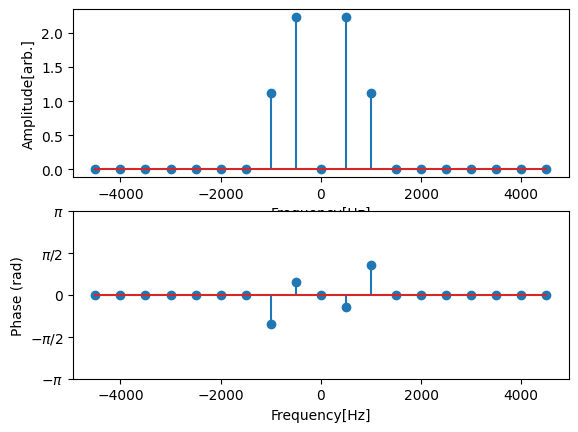

[0. -0.j 0. -0.j 0. -0.j 0. -0.j 0. -0.j 0. -0.j 0. -0.j 0.5-1.j 2. +1.j
 0. +0.j 2. -1.j 0.5+1.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j]


In [43]:
fs = 44100
f0 = 500
D1 = 2*np.sqrt(5)
ph1 = -np.arctan(1/2)
D2 = np.sqrt(5)
ph2 = -np.arctan(2)

t = np.arange(0, 1, 1/fs)
pt = D1*np.cos(2*np.pi*f0*t + ph1) + D2*np.cos(2*np.pi*(2*f0)*t + ph2)

plt.subplot(3, 1, 1)
plot_wave(t[0:300], pt[0:300])

n_max = 10
Cn_half = np.zeros(n_max, dtype='complex')
Cn_half[1] = np.sqrt(5)*np.exp(-1j*np.arctan(1/2))
Cn_half[2] = np.sqrt(5)/2*np.exp(1j*np.arctan(2))
Cn = set_cmplxC(Cn_half)
plot_cmplx_spectrum(f0, Cn)
print(Cn)

#### 波形3


$p (t) = \frac{1}{\pi} + \frac{1}{2} \sin (2 \pi f_0 t) - \frac{2}{\pi} \left\{ \frac{1}{3} \cos(2 \pi (2 f_0) t ) + \frac{1}{15} \cos(2 \pi (4 f_0) t ) + \cdots +\frac{1}{(4k^2-1)} \cos( 2 \pi (2k f_0) t )+ \cdots  \right\}$

$A_n$ と $B_n$ を読み取る。直流成分と基本波と偶数次の高調波が含まれている。
+ 直流成分：$A_0 = \frac{1}{\pi}$
+ 基本波：$A_1 = 0$, $B_1 = \frac{1}{2}$
+ 偶数次高調波： $A_{2k} = -\frac{2}{\pi}\frac{1}{4 k^2 -1}= -\frac{2}{\pi} \frac{1}{(2 k)^2 -1}$, $B_{2k} = 0$  
+ 奇数次高調波： $A_{2k-1} = 0$, $B_{2k-1} = 0$

よって、
+ $C_0 = \frac{1}{\pi}$
+ $C_1 = \frac{1}{2}(0 - j\frac{1}{2})=-j\frac{1}{4}$, $C_{-1} = j\frac{1}{4}$
+ $C_{\pm 2k} = -\frac{1}{\pi}\frac{1}{4 k^2 -1}$, $C_{\pm (2k-1)} = 0$

In [49]:
def cal_nth_wave(n, f0, t):
    """
    第n高調波の波形を生成
    """
    nth_wave = (-2/np.pi)*(1/(n**2-1))*np.cos(2*np.pi*(n*f0)*t)
    return nth_wave

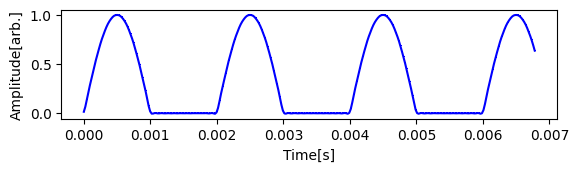

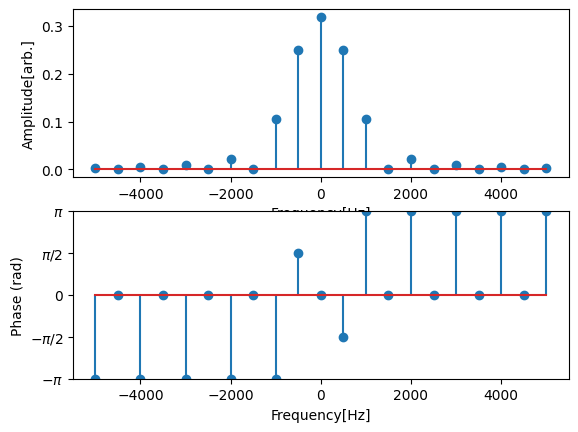

[-0.00079777-0.j    0.        -0.j   -0.00098548-0.j    0.        -0.j
 -0.00124827-0.j    0.        -0.j   -0.00163236-0.j    0.        -0.j
 -0.00222594-0.j    0.        -0.j   -0.00321525-0.j    0.        -0.j
 -0.00505254-0.j    0.        -0.j   -0.00909457-0.j    0.        -0.j
 -0.02122066-0.j    0.        -0.j   -0.1061033 -0.j    0.        +0.25j
  0.31830989+0.j    0.        -0.25j -0.1061033 +0.j    0.        +0.j
 -0.02122066+0.j    0.        +0.j   -0.00909457+0.j    0.        +0.j
 -0.00505254+0.j    0.        +0.j   -0.00321525+0.j    0.        +0.j
 -0.00222594+0.j    0.        +0.j   -0.00163236+0.j    0.        +0.j
 -0.00124827+0.j    0.        +0.j   -0.00098548+0.j    0.        +0.j
 -0.00079777+0.j  ]


In [50]:
fs = 44100
f0 = 500
t = np.arange(0, 1, 1/fs)

n_start = 2
n_end = 21
n_skip = 2  # 偶数の高調波をスキップ

A0 = 1/np.pi
B1 = 1/2
sum = A0 + B1*np.sin(2*np.pi*f0*t) # 直流成分と基本波成分

# 偶数次高調波を加算
for n in range(n_start, n_end, n_skip):
    nth_wave = cal_nth_wave(n, f0, t)
    sum += nth_wave

plt.subplot(3, 1, 1)
plot_wave(t[0:300], sum[0:300], color='b')

n_max = n_end
Cn_half = np.zeros(n_max, dtype='complex')
Cn_half[0] = A0
Cn_half[1] = -1j * 1.0/4.0

# 偶数次高調波を加算
for n in range(n_start, n_end, n_skip):
    Cn_half[n] = (-1/np.pi)*(1/(n**2-1))

Cn = set_cmplxC(Cn_half)
plot_cmplx_spectrum(f0, Cn)
print(Cn)

ここでは、周期波形すなわち、無限の過去から無限の未来まで周期的な波形を考えてきた。しかし、実際の波は、始まりがあり終わりがある。つまり、フーリエ級数展開では、その波を構成する成分を分析することができないため、フーリエ変換が必要となる。フーリエ変換は次のように表すことができる。

$
C_n = \frac{1}{T_0} \int_0^{T_0}\ f(t)\ e^{-j2 \pi n f_0 t} dt = \frac{1}{T_0} \int_0^{T_0}\ f(t)\ e^{-jn\omega_0 t} dt
$

フーリエ級数展開の積分区間は1周期分であればどこでも同じ結果を与えられる。これは、周期波形なので、例えば積分区間を右にずらした場合、右側から入ってくる波形と左側から出ていく波形は同じになるためである。そこで、上式は以下のように積分区間を変更することができる。

$
C_n = \frac{1}{T_0} \int_{-T_0/2}^{T_0/2} f(t) e^{-jn\omega_0 t} dt
$

フーリエ変換は、始まりと終わりのある波 $f(t)$ に対応するスペクトル $P(\omega)$ を求める変換であり、次式で定義される。

$
P(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j \omega t} dt
$